# FakeRank
Hrishi Dharam, Eilam Levitov  
March 16, 2017  

### Abstract 


In [3]:
import numpy as np
import util # Linear Algebra/PageRank
from util import PersonalizedPageRank as ppr 
import misc # Random libraries and graphing
import matplotlib.pyplot as plt
import ipywidgets as widgets
from __future__ import division
%matplotlib inline  

/Users/Hrishid/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
# 1) Google Search
inputText = widgets.Text()
inputText

In [5]:
inputText.value.decode('unicode_escape').encode('ascii','ignore')

'smelly fish'

In [6]:
links = misc.gSearch(str(inputText.value.decode('unicode_escape').encode('ascii','ignore')))

Retrieving pages...
http://www.delish.com/food/news/a38906/top-ten-stinky-foods-durian-natto/
https://www.chowhound.com/post/fish-eat-fishy-smell-863361
http://www.miaminewtimes.com/restaurants/the-science-behind-the-fishy-smell-in-smelly-fish-6574273
http://www.medicinenet.com/fish_odor_syndrome_trimethylaminuria/article.htm
https://en.wikipedia.org/wiki/Surstr%C3%B6mming
http://cooking.stackexchange.com/questions/13764/do-some-fish-smell-fishier-why
http://learningenglish.voanews.com/a/words-and-their-stories-smelly-fish/3703914.html
https://forums.egullet.org/topic/153033-slightly-smelly-cod/
https://munchies.vice.com/en_us/topic/smelly-fish
https://www.nutrition.org/asn-blog/2011/08/is-fish-smelly/
http://www.app.com/story/sports/outdoors/fishing/hook-line-and-sinker/2014/10/09/ocean-facts-makes-fish-smell/16991205/
https://www.youtube.com/watch?v=hOcSU3gPTYI
https://www.nytimes.com/2016/10/26/opinion/not-just-another-stinky-fish.html
http://www.firsttankguide.net/odor.php
http://w

In [7]:
print len(links)

50


In [8]:
# 2) Create Similarity Matrix
mtx = misc.simMatrix(links)

Generating similarity vectors...
9th parse was unsuccessful :(
17th parse was unsuccessful :(
46th parse was unsuccessful :(
11
Similarity Matrix computed
76.4280478954


In [9]:
#print mtx[10:20]
for i in mtx:
    if sum(i) == 0:
        print i
        print "isn't working"

In [10]:
badIndeces = [i for i in range(mtx.shape[0]) if sum(mtx[i]) == 0]
print badIndeces

[]


In [11]:
for i in sorted(badIndeces, reverse=True):
    mtx = np.delete(mtx, i, axis = 1)
    mtx = np.delete(mtx, i, axis = 0)
badIndeces = [i for i in range(mtx.shape[0]) if sum(mtx[i]) == 0]
print badIndeces
    

[]


[[ 0.          0.02631579  0.02631579 ...,  0.02631579  0.          0.02631579]
 [ 0.02702703  0.          0.02702703 ...,  0.02702703  0.          0.02702703]
 [ 0.02631579  0.02631579  0.         ...,  0.02631579  0.          0.02631579]
 ..., 
 [ 0.03333333  0.03333333  0.03333333 ...,  0.          0.          0.03333333]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.03571429  0.03571429  0.03571429 ...,  0.03571429  0.          0.        ]]


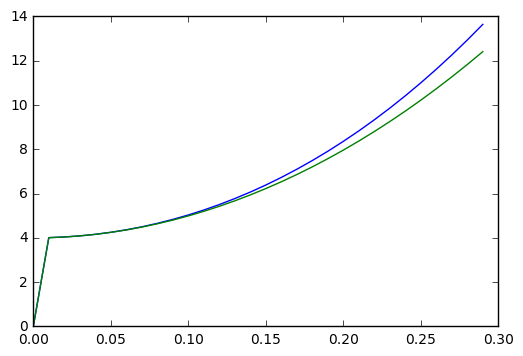

choose alpha=.05
4.08985514407


In [12]:
clustering = ppr(adjacencyMatrix = mtx, alpha = .1)
print clustering.transitionMatrix
v = [clustering.prVariance(alpha) for alpha in np.arange(0,.3,.01)]
plt.plot(np.arange(0, .3, .01), v)
plt.plot(np.arange(0, .3, .01), [clustering.clusterVariance(alpha) for alpha in np.arange(0, .3, .01)])
plt.show()
print 'choose alpha=.05'
print clustering.prVariance(.03)

In [17]:
stationaryDist = 1/clustering.n * sum(clustering.getHubVectors())

v = clustering.pageRank()

[ 0.03209459  0.03125     0.03209459  0.03125     0.01942568  0.02618243
  0.02364865  0.02449324  0.02027027  0.00506757  0.00084459  0.02027027
  0.02871622  0.00844595  0.00591216  0.02364865  0.00675676  0.02449324
  0.02956081  0.02027027  0.02027027  0.02956081  0.01435811  0.01858108
  0.01013514  0.02871622  0.03125     0.01266892  0.02449324  0.01435811
  0.01435811  0.02618243  0.02618243  0.02027027  0.02871622  0.02280405
  0.03293919  0.02787162  0.02364865  0.02871622  0.03040541  0.02618243
  0.02280405  0.02533784  0.00084459  0.02364865]
[ 0.03209459  0.03125     0.03209459  0.03125     0.01942568  0.02618243
  0.02364865  0.02449324  0.02027027  0.00506757  0.00084459  0.02027027
  0.02871622  0.00844595  0.00591216  0.02364865  0.00675676  0.02449324
  0.02956081  0.02027027  0.02027027  0.02956081  0.01435811  0.01858108
  0.01013514  0.02871622  0.03125     0.01266892  0.02449324  0.01435811
  0.01435811  0.02618243  0.02618243  0.02027027  0.02871622  0.02280405
 

In [32]:
k=5
c = 10


[[ 0.          0.          0.         ...,  0.07692308  0.          0.07692308]
 [ 0.          0.          1.         ...,  0.          0.          0.        ]
 [ 0.          0.33333333  0.         ...,  0.33333333  0.          0.        ]
 ..., 
 [ 0.04        0.          0.04       ...,  0.          0.04        0.04      ]
 [ 0.          0.          0.         ...,  0.04545455  0.          0.04545455]
 [ 0.04166667  0.          0.         ...,  0.04166667  0.04166667  0.        ]]
